In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('img_path.csv')
df

,pid,cid,frid,img_path
0,0,c1,0,WILDTRACK-ReID/0_c1_00000000.png
1,0,c1,5,WILDTRACK-ReID/0_c1_00000005.png
2,0,c1,10,WILDTRACK-ReID/0_c1_00000010.png
3,0,c1,15,WILDTRACK-ReID/0_c1_00000015.png
4,0,c1,20,WILDTRACK-ReID/0_c1_00000020.png
...,...,...,...,...
38318,1198,c7,1980,WILDTRACK-ReID/1198_c7_00001980.png
38319,1198,c7,1985,WILDTRACK-ReID/1198_c7_00001985.png
38320,1198,c7,1990,WILDTRACK-ReID/1198_c7_00001990.png
38321,1200,c3,1930,WILDTRACK-ReID/1200_c3_00001930.png


In [3]:
n_img_per_pid = df[['pid', 'img_path']].groupby('pid').count().rename(columns={'img_path':'n_imgs'})
display(n_img_per_pid)
n_img_per_pid.describe()

,n_imgs
pid,
0,187
1,230
2,16
3,86
4,88
...,...
1177,96
1191,37
1194,20


,n_imgs
count,313.000000
mean,122.437700
std,259.794365
min,1.000000
25%,35.000000
50%,68.000000
75%,100.000000
max,1918.000000


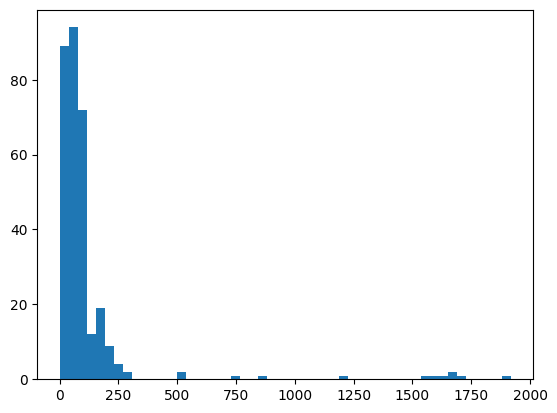

In [4]:
plt.hist(n_img_per_pid, bins=50)
plt.show()

In [5]:
only_one_img = n_img_per_pid[n_img_per_pid['n_imgs'] == 1].index.values
must_in_test_cuz_few_imgs = n_img_per_pid[(n_img_per_pid['n_imgs'] <= 5) & (n_img_per_pid['n_imgs'] > 1)].index.values
n_train = (len(n_img_per_pid) - len(only_one_img))//2
n_test_many_imgs = len(n_img_per_pid) - len(must_in_test_cuz_few_imgs) - len(only_one_img) - n_train
print(n_train, n_test_many_imgs, len(only_one_img), len(must_in_test_cuz_few_imgs))

155 140 3 15


In [6]:
population_pid = n_img_per_pid.index.values
population_pid = population_pid[~np.isin(population_pid, np.concatenate([only_one_img, must_in_test_cuz_few_imgs]))]
print(population_pid.shape)
population_pid[-10:]

(295,)


array([1131, 1148, 1149, 1168, 1173, 1174, 1177, 1191, 1194, 1198])

In [7]:
np.random.seed(1011)
train_pid = np.random.choice(population_pid, size=n_train, replace=False)
test_pid = population_pid[~np.isin(population_pid, train_pid)]
train_pid, test_pid

(array([ 122,  413,  625,  566,  549,   72,   21,   84,  397,  116,  162,
         300,   77,  198,  562,  210,  161,    9,  277,  478,  598,  294,
          22,  525,  166,  353,   87,  435,  177,   13,  247,   14,   27,
         299,  524,  181,  231, 1018,  569,  131,  136,  264, 1106,   57,
         273,   17,  322,   62,  624,   26,  196,  548,  578,  195,  238,
        1173,   12,   41,   54,  622,  526,  121,  582,  576,  229,  149,
         505,  152,   58,  189,  145,   35,   18,   68,   40,    2,   60,
        1120,  370,  120,  262, 1019,   71,   36,   69,  483,  156,  463,
         155,   94,  561,    4,  440, 1108,   65,  488, 1062,  257,  506,
         266,   80,    0,    3,  599,   78,  559,  343,  468,  239,   37,
         172,    5,   50,  408,   32,    7,  471,  560,    8,  609,  607,
         193,  151,  585,  620,  476,  283,  608, 1047,  406, 1168,  224,
         344,   89,  383,  384, 1131,  235,   15,   67,   25,   48,   10,
          23,  510, 1112,   81,  144, 

In [8]:
temp_df = df.loc[np.isin(df['pid'], train_pid)].set_index(['pid', 'cid'])
count_by_pcid = df.loc[np.isin(df['pid'], train_pid)].value_counts(subset=['pid', 'cid'])
large_img_train_df = temp_df.loc[count_by_pcid[count_by_pcid >= 5].index].groupby(['pid', 'cid']).sample(5, replace=False, random_state=127)
train_df = pd.concat([large_img_train_df, temp_df.loc[count_by_pcid[count_by_pcid < 5].index]]).sort_values(['pid', 'cid', 'frid']).reset_index()
train_df

,pid,cid,frid,img_path
0,0,c1,40,WILDTRACK-ReID/0_c1_00000040.png
1,0,c1,50,WILDTRACK-ReID/0_c1_00000050.png
2,0,c1,60,WILDTRACK-ReID/0_c1_00000060.png
3,0,c1,100,WILDTRACK-ReID/0_c1_00000100.png
4,0,c1,110,WILDTRACK-ReID/0_c1_00000110.png
...,...,...,...,...
3431,1173,c6,1885,WILDTRACK-ReID/1173_c6_00001885.png
3432,1173,c6,1890,WILDTRACK-ReID/1173_c6_00001890.png
3433,1173,c6,1945,WILDTRACK-ReID/1173_c6_00001945.png
3434,1173,c6,1950,WILDTRACK-ReID/1173_c6_00001950.png


In [9]:
temp_df = df.loc[np.isin(df['pid'], test_pid)].set_index(['pid', 'cid'])
count_by_pcid = df.loc[np.isin(df['pid'], test_pid)].value_counts(subset=['pid', 'cid'])
large_img_test_df = temp_df.loc[count_by_pcid[count_by_pcid >= 6].index].groupby(['pid', 'cid']).sample(6, replace=False, random_state=127)
test_df = pd.concat([large_img_test_df, temp_df.loc[count_by_pcid[count_by_pcid < 6].index]]).reset_index()
test_df = pd.concat([test_df, df[np.isin(df['pid'], must_in_test_cuz_few_imgs)]])
test_df = pd.concat([test_df, df[np.isin(df['pid'], only_one_img)]]).set_index(['pid', 'cid'])#.sort_values(['pid', 'cid', 'frid']).reset_index(drop=True)
test_df

frid                             img_path
pid  cid                                           
1    c1     50     WILDTRACK-ReID/1_c1_00000050.png
     c1    100     WILDTRACK-ReID/1_c1_00000100.png
     c1     40     WILDTRACK-ReID/1_c1_00000040.png
     c1    190     WILDTRACK-ReID/1_c1_00000190.png
     c1     30     WILDTRACK-ReID/1_c1_00000030.png
...        ...                                  ...
1200 c3   1930  WILDTRACK-ReID/1200_c3_00001930.png
     c4   1930  WILDTRACK-ReID/1200_c4_00001930.png
31   c3      0    WILDTRACK-ReID/31_c3_00000000.png
516  c3   1060   WILDTRACK-ReID/516_c3_00001060.png
623  c3   1135   WILDTRACK-ReID/623_c3_00001135.png

[3848 rows x 2 columns]

In [10]:
count_by_pcid_query = test_df.value_counts(subset=['pid', 'cid'])
many_img_query_df = test_df.loc[count_by_pcid_query[count_by_pcid_query > 1].index].groupby(['pid', 'cid']).sample(1, replace=False, random_state=127)
count_by_pid_query = test_df.loc[count_by_pcid_query[count_by_pcid_query == 1].index].value_counts(subset='pid')
few_img_query_df = test_df.loc[count_by_pid_query[count_by_pid_query > 1].index].groupby('pid').sample(1, replace=False, random_state=127)
query_df = pd.concat([many_img_query_df, few_img_query_df]).sort_values(['pid', 'cid', 'frid']).reset_index()
query_df

,pid,cid,frid,img_path
0,1,c1,0,WILDTRACK-ReID/1_c1_00000000.png
1,1,c2,30,WILDTRACK-ReID/1_c2_00000030.png
2,1,c3,75,WILDTRACK-ReID/1_c3_00000075.png
3,1,c4,185,WILDTRACK-ReID/1_c4_00000185.png
4,1,c5,140,WILDTRACK-ReID/1_c5_00000140.png
...,...,...,...,...
690,1198,c3,1960,WILDTRACK-ReID/1198_c3_00001960.png
691,1198,c5,1955,WILDTRACK-ReID/1198_c5_00001955.png
692,1198,c6,1960,WILDTRACK-ReID/1198_c6_00001960.png
693,1198,c7,1960,WILDTRACK-ReID/1198_c7_00001960.png


In [11]:
test_df = test_df.reset_index()[~np.isin(test_df['img_path'], query_df['img_path'])].sort_values(['pid', 'cid', 'frid']).reset_index(drop=True)
test_df

,pid,cid,frid,img_path
0,1,c1,30,WILDTRACK-ReID/1_c1_00000030.png
1,1,c1,40,WILDTRACK-ReID/1_c1_00000040.png
2,1,c1,50,WILDTRACK-ReID/1_c1_00000050.png
3,1,c1,100,WILDTRACK-ReID/1_c1_00000100.png
4,1,c1,190,WILDTRACK-ReID/1_c1_00000190.png
...,...,...,...,...
3148,1198,c7,1965,WILDTRACK-ReID/1198_c7_00001965.png
3149,1198,c7,1975,WILDTRACK-ReID/1198_c7_00001975.png
3150,1198,c7,1980,WILDTRACK-ReID/1198_c7_00001980.png
3151,1198,c7,1990,WILDTRACK-ReID/1198_c7_00001990.png


In [16]:
import os
import shutil

DATA_DIR = "WILDTRACK"
if not os.path.exists(DATA_DIR):
    os.mkdir(DATA_DIR)
    data_dict = {'train':train_df,
                'query':query_df,
                'gallery': test_df}
    for subset, path_df in data_dict.items():
        subdir = os.path.join(DATA_DIR, subset)
        os.mkdir(subdir)
        for p in path_df['img_path']:
            fname = p.split('/')[-1]
            shutil.copy(p, os.path.join(subdir, fname))

        print("Done:", subset)

Done: train
Done: query
Done: gallery
